In [3]:
from datasets import Dataset

In [4]:
helix_ds_path = "/home/wzarzecki/ds_secondary_struct/helix_ds"
helix_ds = Dataset.load_from_disk(helix_ds_path)
helix_ds[0]

Loading dataset from disk:   0%|          | 0/28 [00:00<?, ?it/s]

{'values': tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 'structure_id': 'xxx_0_c4e8cf7d-8850-486c-8a9a-76f0b46a751a',
 'timestep_id': tensor(1),
 'token_id': tensor(0),
 'secondary_struct': None,
 'helix': tensor(False)}

In [5]:
df = helix_ds.to_pandas()

In [6]:
df.head()

,values,structure_id,timestep_id,token_id,secondary_struct,helix
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",xxx_0_c4e8cf7d-8850-486c-8a9a-76f0b46a751a,1,0,None,False
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",xxx_0_c4e8cf7d-8850-486c-8a9a-76f0b46a751a,1,1,None,False
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",xxx_0_c4e8cf7d-8850-486c-8a9a-76f0b46a751a,1,2,None,False
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",xxx_0_c4e8cf7d-8850-486c-8a9a-76f0b46a751a,1,3,None,False
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",xxx_0_c4e8cf7d-8850-486c-8a9a-76f0b46a751a,1,4,E,False


In [7]:
df["helix"].value_counts()

helix
True     444800
False    287650
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split






group_df = df[['structure_id', 'helix']].drop_duplicates('structure_id')


train_ids, test_ids = train_test_split(
    group_df['structure_id'],
    test_size=0.2,
    stratify=group_df['helix'],
    random_state=42
)


train_df = df[df['structure_id'].isin(train_ids)]
test_df = df[df['structure_id'].isin(test_ids)]

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTrain set 'helix' distribution:")
print(train_df['helix'].value_counts(normalize=True))
print("\nTest set 'helix' distribution:")
print(test_df['helix'].value_counts(normalize=True))


Train set shape: (583750, 6)
Test set shape: (148700, 6)

Train set 'helix' distribution:
helix
True     0.606681
False    0.393319
Name: proportion, dtype: float64

Test set 'helix' distribution:
helix
True     0.609617
False    0.390383
Name: proportion, dtype: float64


In [12]:
train_df_small = train_df.sample(frac=0.1)
test_df_small = test_df.sample(frac=0.1)

fitting


/home/wzarzecki/miniforge3/envs/diffsae/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fitted
Accuracy: 0.8289
Balanced Accuracy: 0.8285
ROC AUC Score: 0.9263


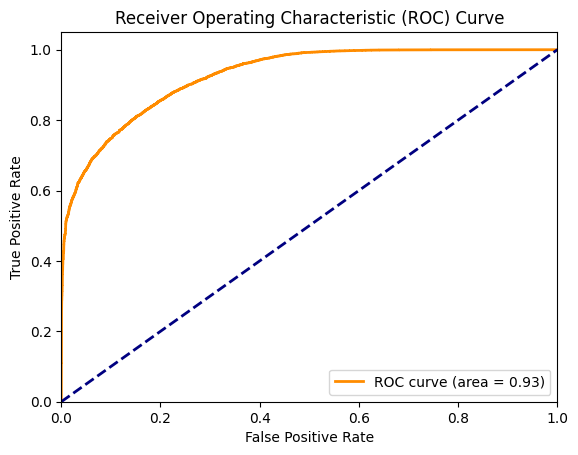

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve,
import matplotlib.pyplot as plt


X_train = np.array(train_df_small['values'].tolist())
y_train = train_df_small['helix']
X_test = np.array(test_df_small['values'].tolist())
y_test = test_df_small['helix']



log_reg = LogisticRegression(class_weight='balanced') 
print("fitting")
log_reg.fit(X_train, y_train)
print("fitted")


y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
y_pred

array([ True, False, False, ..., False,  True,  True])

0.952511362249945


/tmp/ipykernel_1489438/4282577836.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


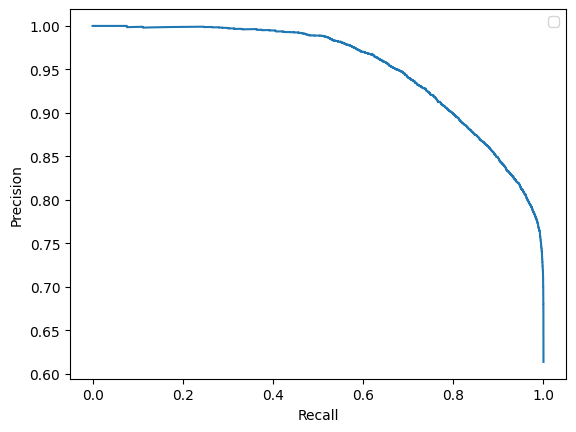

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

print(average_precision_score(y_test, y_pred_proba))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

plt.show()
